In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
df = pd.read_csv('tyler_24h.csv')
df = df.dropna()
print(df.shape)

(1650, 15)


In [19]:
def hours_from_unix(unix):
    time = datetime.datetime.fromtimestamp(unix)
    hours = time.hour
    minutes = time.minute
    return hours + (minutes / 60)

df['hour'] = df['unix'].apply(hours_from_unix)

In [20]:
df.head(25)

,unix,player_elo,opp_elo,opp_name,opp_30d,elo_diff,color,player_acc,opp_acc,acc_diff,won,num_reque,time_since_prev,opp_num_reque,opp_time_since_prev,hour
0,1696185098,1090,1063,Quarini,249,27,False,69.43,62.25,7.18,1.0,0,0,2.0,325.0,14.516667
1,1696186352,1097,1091,hgarciarod,339,6,True,78.20,69.40,8.80,1.0,0,1254,2.0,1108.0,14.866667
2,1696187659,1105,1139,HERFJERF,113,-34,False,92.66,80.43,12.23,1.0,0,1307,0.0,48092.0,15.233333
4,1696189372,1113,1105,InkLv,116,8,False,83.82,72.41,11.41,1.0,2,529,1.0,557.0,15.700000
5,1696190619,1121,1105,alamrini,308,16,True,80.57,78.02,2.55,0.0,3,1247,0.0,5208.0,16.050000
6,1696191447,1113,1143,djgreen1,193,-30,True,64.50,57.93,6.57,1.0,4,828,3.0,832.0,16.283333
7,1696192994,1122,1088,Pytoo91,221,34,False,51.35,64.64,-13.29,0.0,0,1547,0.0,1318.0,16.716667
8,1696193859,1113,1078,mumergaddafi,121,35,True,73.48,58.18,15.30,1.0,1,865,18.0,892.0,16.950000
9,1696196998,1120,1122,Copertus,505,-2,True,79.47,66.51,12.96,1.0,0,3139,0.0,13265.0,17.816667
10,1696198095,1128,1109,CyborgCerberus94,42,19,False,65.14,81.79,-16.65,0.0,1,1097,0.0,2098.0,18.133333


c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quantile_group', ylabel='won'>

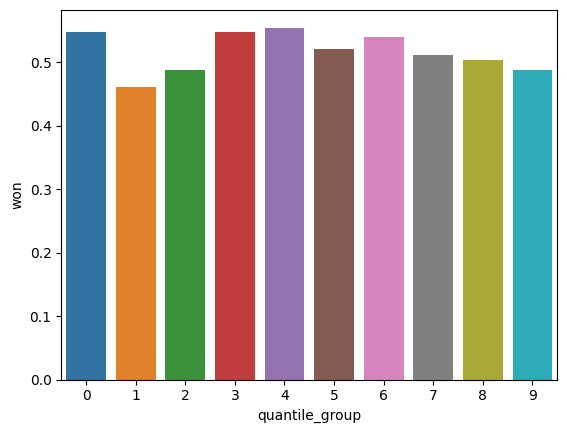

In [21]:
df['quantile_group'] = pd.qcut(df['hour'], 10, labels=False)

# Then, calculate mean 'won' for each quantile group
grouped_data = df.groupby('quantile_group')['won'].mean().reset_index()

# Plotting the bar chart
sns.barplot(x='quantile_group', y='won', data=grouped_data)

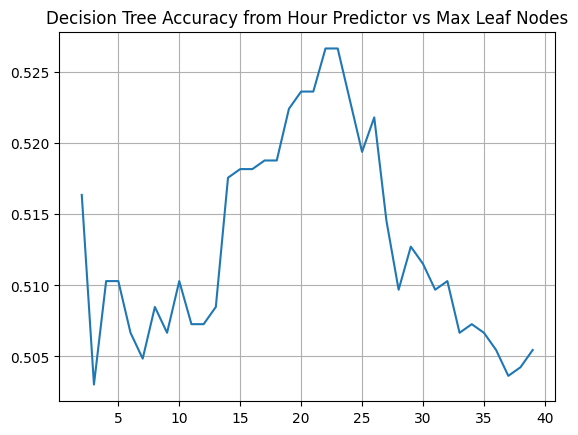

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

X = df[['hour']]
y = df['won']

accuracies = {}

for max_leaf in range(2, 40):
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    accuracies[max_leaf] = np.mean(scores)

plt.plot(accuracies.keys(), accuracies.values())
plt.grid()
plt.title("Decision Tree Accuracy from Hour Predictor vs Max Leaf Nodes")
plt.show()